<a href="https://colab.research.google.com/github/ethlynsaltzman/project-3/blob/main/project3u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [366]:
import pandas as pd
df3 = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')

In this project I compared drug related crimes (possession and sale) between th police precinct I live in and the rest of NYC.

In [367]:
df3.shape

(170095, 24)

In [368]:
df3.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                         int64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
Community Districts         float64
Borough Boundaries          float64
City Council Districts      float64
Police Precincts            float64
Zip Codes                   float64
dtype: object

In [369]:
df3.head(20)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,...,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426),16.0,2.0,49.0,49.0,17618.0
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,...,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923),55.0,2.0,25.0,46.0,17614.0
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,...,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468),1.0,2.0,44.0,37.0,17616.0
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,...,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797),18.0,4.0,36.0,20.0,12427.0
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,...,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175),16.0,2.0,48.0,49.0,17615.0
5,262030390,01/17/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,...,1040264,190275,40.688762,-73.798020,POINT (-73.79802 40.688762),41.0,3.0,46.0,71.0,24670.0
6,262362214,01/23/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,...,999439,236537,40.815904,-73.945123,POINT (-73.945123 40.815904),18.0,4.0,36.0,20.0,12427.0
7,264579718,03/04/2023,153,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,...,997843,175671,40.648851,-73.951017,POINT (-73.951016510623 40.6488507469884),61.0,2.0,11.0,40.0,13510.0
8,262500981,01/25/2023,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,M,14,...,987078,215157,40.757232,-73.989792,POINT (-73.98979219 40.75723226),12.0,4.0,10.0,8.0,13094.0
9,265281035,03/17/2023,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,F,M,24,...,992960,230413,40.799102,-73.968541,POINT (-73.96854103 40.79910212),20.0,4.0,23.0,15.0,12422.0


In [370]:
#Filtered dowen column to thos of interest
dft = df3[[	'ARREST_KEY','ARREST_PRECINCT','PD_DESC','PERP_RACE','ARREST_BORO']]

In [371]:
# cleaning
dft['PD_DESC'].unique()

array(['ASSAULT 2,1,UNCLASSIFIED', 'CONTROLLED SUBSTANCE,SALE 3',
       'STRANGULATION 1ST', 'RAPE 3', 'FORGERY,ETC.,UNCLASSIFIED-FELO',
       'BURGLARY,UNCLASSIFIED,UNKNOWN', 'ARSON 2,3,4', 'ASSAULT 3',
       'ROBBERY,OPEN AREA UNCLASSIFIED', 'LARCENY,PETIT FROM OPEN AREAS,',
       'RAPE 1', 'WEAPONS POSSESSION 3', 'CONSPIRACY 2, 1',
       'HARASSMENT,SUBD 1,CIVILIAN', 'RAPE 2', 'LEWDNESS,PUBLIC',
       'JOSTLING', 'SEXUAL ABUSE', '(null)',
       'IMPERSONATION 2, PUBLIC SERVAN', 'ESCAPE 3', 'ARSON 1',
       'BURGLARY,RESIDENCE,NIGHT', 'BURGLARS TOOLS,UNCLASSIFIED',
       'MENACING,UNCLASSIFIED', 'TRAFFIC,UNCLASSIFIED MISDEMEAN',
       'LEAVING SCENE-ACCIDENT-PERSONA', 'RECKLESS ENDANGERMENT 2',
       'CONTROLLED SUBSTANCE, POSSESSI', 'SEXUAL ABUSE 3,2',
       'FORGERY,ETC.-MISD.', 'INTOXICATED DRIVING,ALCOHOL',
       'FUGITIVE/OTHER STATES', 'THEFT OF SERVICES, UNCLASSIFIE',
       'FORGERY-ILLEGAL POSSESSION,VEH', 'STOLEN PROPERTY 3,POSSESSION',
       'AGGRAVATED HARAS

In [372]:
dft['PERP_RACE'].unique()

array(['BLACK', 'WHITE', 'ASIAN / PACIFIC ISLANDER', 'WHITE HISPANIC',
       'BLACK HISPANIC', 'UNKNOWN', 'AMERICAN INDIAN/ALASKAN NATIVE'],
      dtype=object)

In [373]:
dft['PERP_RACE']= dft['PERP_RACE'].apply(str)

<ipython-input-373-0a55d343f5f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['PERP_RACE']= dft['PERP_RACE'].apply(str)


In [374]:
dft = dft.loc[dft["PERP_RACE"] !=  "Nan" ]
dft = dft.loc[dft["PERP_RACE"] !=  "UNKNOWN" ]
dft = dft.replace('WHITE HISPANIC','HISPANIC').replace('BLACK HISPANIC','HISPANIC').replace('AMERICAN INDIAN/ALASKAN NATIVE',"OTHER")

dft = dft.replace('ASIAN / PACIFIC ISLANDER',"OTHER")
dft.shape

(167614, 5)

In [375]:
dft.head(10)

,ARREST_KEY,ARREST_PRECINCT,PD_DESC,PERP_RACE,ARREST_BORO
0,261209118,77,"ASSAULT 2,1,UNCLASSIFIED",BLACK,K
1,262984267,73,"CONTROLLED SUBSTANCE,SALE 3",BLACK,K
2,263664549,62,STRANGULATION 1ST,WHITE,K
3,261345231,32,STRANGULATION 1ST,BLACK,M
4,263536618,71,"ASSAULT 2,1,UNCLASSIFIED",BLACK,K
5,262030390,113,STRANGULATION 1ST,BLACK,Q
6,262362214,32,STRANGULATION 1ST,BLACK,M
7,264579718,67,RAPE 3,BLACK,K
8,262500981,14,"FORGERY,ETC.,UNCLASSIFIED-FELO",BLACK,M
9,265281035,24,"BURGLARY,UNCLASSIFIED,UNKNOWN",BLACK,M


In [376]:
dft['PD_DESC']= dft['PD_DESC'].apply(str)
dft['ARREST_PRECINCT']= dft['ARREST_PRECINCT'].apply(str)


In [377]:
#decided to look specifically at cerimes related to controlled substances
dft = (dft[dft['PD_DESC'].str.contains('CONTROLLED SUBSTANCE')])

In [378]:
dft.head(10)

,ARREST_KEY,ARREST_PRECINCT,PD_DESC,PERP_RACE,ARREST_BORO
1,262984267,73,"CONTROLLED SUBSTANCE,SALE 3",BLACK,K
143,263173253,25,"CONTROLLED SUBSTANCE, POSSESSI",HISPANIC,M
147,264350032,75,"CONTROLLED SUBSTANCE, POSSESSI",BLACK,K
156,264177492,90,"CONTROLLED SUBSTANCE, POSSESSI",HISPANIC,K
158,264965240,76,"CONTROLLED SUBSTANCE, POSSESSI",BLACK,K
165,266702719,106,"CONTROLLED SUBSTANCE,INTENT TO",BLACK,Q
188,266019757,28,"CONTROLLED SUBSTANCE, POSSESSI",BLACK,M
247,262567032,83,"CONTROLLED SUBSTANCE,INTENT TO",BLACK,K
281,264717985,40,"CONTROLLED SUBSTANCE,INTENT TO",HISPANIC,B
290,264993780,40,"CONTROLLED SUBSTANCE, POSSESSI",WHITE,B


In [379]:
#created column to seprate my police precinct from tghe rest of the city
import numpy as np
dft['Precinct'] = np.where(dft['ARREST_PRECINCT'] == "50", 'My Precinct', 'Rest_of_NYC')
dfg = dft.groupby(['Precinct']).count()
print(dfg)


             ARREST_KEY  ARREST_PRECINCT  PD_DESC  PERP_RACE  ARREST_BORO
Precinct                                                                 
My Precinct          26               26       26         26           26
Rest_of_NYC       11065            11065    11065      11065        11065


In [380]:
# wante to collapse intotwo categories possesion only, and intent to sell or sale
dft['PD_DESC'].unique()

array(['CONTROLLED SUBSTANCE,SALE 3', 'CONTROLLED SUBSTANCE, POSSESSI',
       'CONTROLLED SUBSTANCE,INTENT TO', 'CONTROLLED SUBSTANCE, INTENT T',
       'CONTROLLED SUBSTANCE,SALE 2', 'CONTROLLED SUBSTANCE,POSSESS.',
       'CONTROLLED SUBSTANCE, SALE 5', 'CONTROLLED SUBSTANCE,SALE 1',
       'CONTROLLED SUBSTANCE, SALE 4'], dtype=object)

In [381]:
dft['SALE']= dft['PD_DESC'].str.contains('INTENT|SALE')



In [382]:
dft.tail(10)

,ARREST_KEY,ARREST_PRECINCT,PD_DESC,PERP_RACE,ARREST_BORO,Precinct,SALE
169921,273423890,106,"CONTROLLED SUBSTANCE, POSSESSI",BLACK,Q,Rest_of_NYC,False
169943,274696709,121,"CONTROLLED SUBSTANCE, POSSESSI",WHITE,S,Rest_of_NYC,False
169953,274191981,25,"CONTROLLED SUBSTANCE, POSSESSI",HISPANIC,M,Rest_of_NYC,False
169970,269110743,79,"CONTROLLED SUBSTANCE, POSSESSI",WHITE,K,Rest_of_NYC,False
169990,274366071,79,"CONTROLLED SUBSTANCE,SALE 3",HISPANIC,K,Rest_of_NYC,True
170012,268945614,83,"CONTROLLED SUBSTANCE, POSSESSI",HISPANIC,K,Rest_of_NYC,False
170020,273833360,33,"CONTROLLED SUBSTANCE, POSSESSI",BLACK,M,Rest_of_NYC,False
170027,269489196,60,"CONTROLLED SUBSTANCE, POSSESSI",WHITE,K,Rest_of_NYC,False
170059,272990065,103,"CONTROLLED SUBSTANCE,INTENT TO",BLACK,Q,Rest_of_NYC,True
170074,274572309,25,"CONTROLLED SUBSTANCE, POSSESSI",BLACK,M,Rest_of_NYC,False


In [383]:
#wanted to compare possesion/sale in my police precinct with the mean for other NYC precincts
dfl= dft.groupby(['Precinct','ARREST_PRECINCT','SALE'], as_index= False)['ARREST_KEY'].count()
dfg = dfl.groupby(['Precinct','SALE'], as_index = False).agg ({'ARREST_KEY': 'mean'})
print(dfg)

      Precinct   SALE  ARREST_KEY
0  My Precinct  False   21.000000
1  My Precinct   True    5.000000
2  Rest_of_NYC  False   85.853333
3  Rest_of_NYC   True   61.680000


[Text(0, 0.5, '# of arrests')]

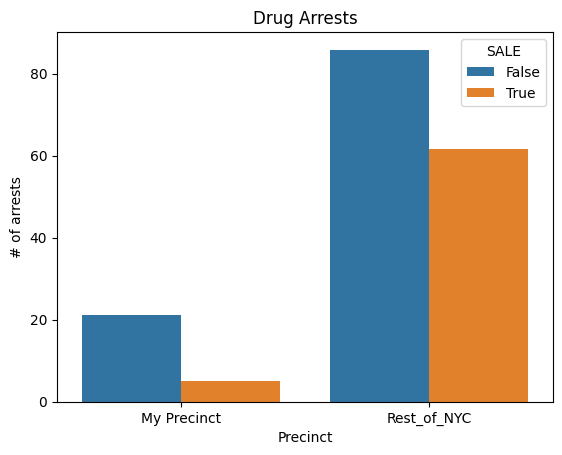

In [384]:
#visulaiztion comparing drug arrests in 50th precinct and throughout the city
import seaborn as sns
ax = sns.barplot(x = 'Precinct', y = 'ARREST_KEY',data = dfl,hue="SALE", errorbar=None)
ax.set(title='Drug Arrests')
ax.set(ylabel='# of arrests')


In [385]:
#breakdiown by borough
dft['ARREST_BORO']= dft['ARREST_BORO'].apply(str)

dfr = dft.groupby(['Precinct','ARREST_PRECINCT','ARREST_BORO','SALE'], as_index= False)['ARREST_KEY'].count()
dfn = dfr.groupby(['Precinct','ARREST_BORO','SALE'], as_index = False).agg ({'ARREST_KEY': 'mean'})
print(dfn)

       Precinct ARREST_BORO   SALE  ARREST_KEY
0   My Precinct           B  False   21.000000
1   My Precinct           B   True    5.000000
2   Rest_of_NYC           B  False  110.363636
3   Rest_of_NYC           B   True   79.000000
4   Rest_of_NYC           K  False   67.217391
5   Rest_of_NYC           K   True   58.391304
6   Rest_of_NYC           M  False  104.809524
7   Rest_of_NYC           M   True   64.047619
8   Rest_of_NYC           Q  False   75.375000
9   Rest_of_NYC           Q   True   48.312500
10  Rest_of_NYC           S  False   68.000000
11  Rest_of_NYC           S   True   74.000000


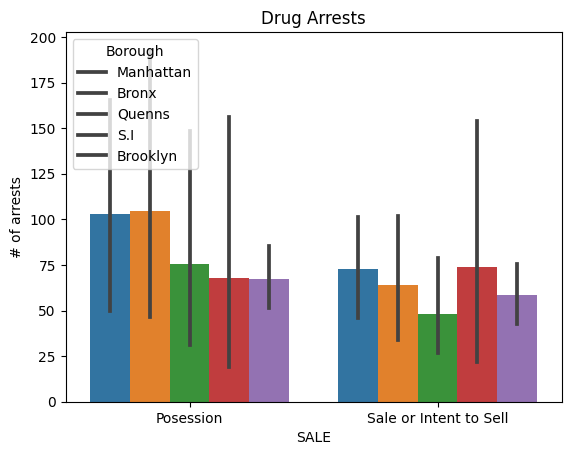

In [392]:
#visualization showing break down by borough of the two categories of drug arrests

ax = sns.barplot(x = 'SALE', y = 'ARREST_KEY',data = dfr,hue="ARREST_BORO")
ax.set(title='Drug Arrests')

ax.set_xticklabels(['Posession', 'Sale or Intent to Sell'])
ax.set(ylabel='# of arrests')



ax.legend(title='Borough', loc='upper left', labels=['Manhattan', 'Bronx','Quenns','S.I','Brooklyn'])


Conclusion:  My police district in the Bronx has much lower  # of drug arrests than the city average, while my borough the Bronx has the largest number of arrests for sales or intent to sell and is 2nd to manhattan in number of arrests for posession